Data Link: https://www.kaggle.com/parulpandey/2020-it-salary-survey-for-eu-region

In [1]:
# !pip install -U pandas-profiling 
# !pip install -U seaborn 
# !pip install autoviz
# !pip install sweetviz 
# !pip install impyute

     |████████████████████████████████| 256kB 3.8MB/s 
     |████████████████████████████████| 645kB 27.1MB/s 
     |████████████████████████████████| 81kB 8.5MB/s 
     |████████████████████████████████| 10.1MB 35.6MB/s 
     |████████████████████████████████| 3.1MB 27.9MB/s 
     |████████████████████████████████| 61kB 6.8MB/s 
     |████████████████████████████████| 112kB 53.1MB/s 
     |████████████████████████████████| 1.1MB 27.4MB/s 
     |████████████████████████████████| 296kB 44.0MB/s 
  Created wheel for htmlmin: filename=htmlmin-0.1.12-cp37-none-any.whl size=27099 sha256=b77301794a85f2040624e7af7221e04a84736a4cb6c10e214eb4fd00431dd2b7
  Stored in directory: /root/.cache/pip/wheels/43/07/ac/7c5a9d708d65247ac1f94066cf1db075540b85716c30255459
  Created wheel for phik: filename=phik-0.11.2-cp37-none-any.whl size=1107437 sha256=0f84f28e705736ac3a793b1a64ca946a95ba698cdc3743e398c92b7fd080c58d
  Stored in directory: /root/.cache/pip/wheels/c0/a3/b0/f27b1cfe32ea131a3715169132ff6d856

In [2]:
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import plotly.express as px
from pandas_profiling import ProfileReport
import sweetviz as sv 
from impyute import mice
import warnings 
from scipy.stats import trim_mean
warnings.simplefilter(action='ignore', category=FutureWarning)

In [8]:
%matplotlib inline

sns.set_style('darkgrid')
plt.style.use('fivethirtyeight')
mpl.rcParams['font.size'] = 14
mpl.rcParams['figure.figsize'] = (10,6)
mpl.rcParams['figure.facecolor'] = '#00000000'



In [ ]:
# glob.glob("IT Salary Survey EU*.csv")

### Year-wise analysis

Let's do an year wise analysis and later, we will check if all 3 years can be merged together.

In [65]:
df_2018 = pd.read_csv("IT Salary Survey EU 2018.csv")
df_2019 = pd.read_csv("IT Salary Survey EU 2019.csv")
df_2020 = pd.read_csv("IT Salary Survey EU 2020.csv")

In [66]:
profile_2018 = ProfileReport(df_2018, title="IT Salary Survey for Year 2018", explorative=True)
profile_2019 = ProfileReport(df_2019, title="IT Salary Survey for Year 2019", explorative=True)
profile_2020 = ProfileReport(df_2020, title="IT Salary Survey for Year 2020", explorative=True)

In [70]:
# profile_2018.to_notebook_iframe()

In [67]:
profile_2018.to_file('it_salary_survey_2018.html')
profile_2019.to_file('it_salary_survey_2019.html')
profile_2020.to_file('it_salary_survey_2020.html')

Summarize dataset:   0%|          | 0/27 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Summarize dataset:   0%|          | 0/36 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Summarize dataset:   0%|          | 0/36 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

The schema in 3 years is little different. 

In [73]:
df_2018.head(5)

,Timestamp,Age,Gender,City,Position,Years of experience,Your level,Current Salary,Salary one year ago,Salary two years ago,Are you getting any Stock Options?,Main language at work,Company size,Company type
0,14/12/2018 12:41:33,43.0,M,München,QA Ingenieur,11.0,Senior,77000.0,76200.0,68000.0,No,Deutsch,100-1000,Product
1,14/12/2018 12:42:09,33.0,F,München,Senior PHP Magento developer,8.0,Senior,65000.0,55000.0,55000.0,No,Deutsch,50-100,Product
2,14/12/2018 12:47:36,32.0,M,München,Software Engineer,10.0,Senior,88000.0,73000.0,54000.0,No,Deutsch,1000+,Product
3,14/12/2018 12:50:15,25.0,M,München,Senior Frontend Developer,6.0,Senior,78000.0,55000.0,45000.0,Yes,English,1000+,Product
4,14/12/2018 12:50:31,39.0,M,München,UX Designer,10.0,Senior,69000.0,60000.0,52000.0,No,English,100-1000,Ecom retailer


In [74]:
df_2019.head(5)

,Zeitstempel,Age,Gender,City,Seniority level,Position (without seniority),Years of experience,Your main technology / programming language,Yearly brutto salary (without bonus and stocks),Yearly bonus,Yearly stocks,Yearly brutto salary (without bonus and stocks) one year ago. Only answer if staying in same country,Yearly bonus one year ago. Only answer if staying in same country,Yearly stocks one year ago. Only answer if staying in same country,Number of vacation days,Number of home office days per month,Main language at work,Company name,Company size,Company type,Сontract duration,Company business sector,0
0,02.12.2019 11:18:26,33.0,Male,Berlin,Senior,Fullstack Developer,13,PHP,64000.0,1000.0,NaN,58000.0,1000.0,NaN,29.0,4.0,English,NaN,50-100,Startup,unlimited,Tourism,NaN
1,02.12.2019 11:18:35,29.0,Male,Berlin,Middle,Backend Developer,3,Python,55000.0,NaN,NaN,55000.0,NaN,NaN,22.0,4.0,English,NaN,10-50,Product,unlimited,Scientific Activities,NaN
2,02.12.2019 11:18:56,NaN,Male,Berlin,Middle,Mobile Developer,4,Kotlin,70000.0,NaN,NaN,55000.0,NaN,NaN,27.0,NaN,English,NaN,1000+,Startup,unlimited,NaN,NaN
3,02.12.2019 11:19:08,30.0,Male,Berlin,Senior,Backend Developer,6,PHP,63000.0,NaN,NaN,NaN,NaN,NaN,24.0,NaN,English,Auto1,100-1000,Product,unlimited,Transport,NaN
4,02.12.2019 11:19:37,32.0,Male,Berlin,Senior,Embedded Developer,10,C/C++,66000.0,NaN,NaN,56000.0,NaN,NaN,30.0,0.0,English,Luxoft,50-100,Product,unlimited,Automotive,NaN


In [77]:
df_2020.head(5)

,Timestamp,Age,Gender,City,Position,Total years of experience,Years of experience in Germany,Seniority level,Your main technology / programming language,Other technologies/programming languages you use often,Yearly brutto salary (without bonus and stocks) in EUR,Yearly bonus + stocks in EUR,Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country,Annual bonus+stocks one year ago. Only answer if staying in same country,Number of vacation days,Employment status,Сontract duration,Main language at work,Company size,Company type,Have you lost your job due to the coronavirus outbreak?,"Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week","Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 2020 in EUR"
0,24/11/2020 11:14:15,26.0,Male,Munich,Software Engineer,5,3,Senior,TypeScript,"Kotlin, Javascript / Typescript",80000.0,5000,75000.0,10000,30,Full-time employee,Unlimited contract,English,51-100,Product,No,NaN,NaN
1,24/11/2020 11:14:16,26.0,Male,Berlin,Backend Developer,7,4,Senior,Ruby,NaN,80000.0,NaN,82000.0,5000,28,Full-time employee,Unlimited contract,English,101-1000,Product,No,NaN,NaN
2,24/11/2020 11:14:21,29.0,Male,Berlin,Software Engineer,12,6,Lead,Javascript / Typescript,"Javascript / Typescript, Docker",120000.0,120000,100000.0,100000,30,Self-employed (freelancer),Temporary contract,English,101-1000,Product,Yes,NaN,NaN
3,24/11/2020 11:15:24,28.0,Male,Berlin,Frontend Developer,4,1,Junior,Javascript,NaN,54000.0,NaN,NaN,NaN,24,Full-time employee,Unlimited contract,English,51-100,Startup,No,NaN,NaN
4,24/11/2020 11:15:46,37.0,Male,Berlin,Backend Developer,17,6,Senior,C# .NET,".NET, SQL, AWS, Docker",62000.0,NaN,62000.0,NaN,29,Full-time employee,Unlimited contract,English,101-1000,Product,No,NaN,NaN


In [79]:
# Normalizing the timestamp column
df_2019 = df_2019.rename(columns={
    'Zeitstempel':'Timestamp',
})

df_2019['Timestamp'] = pd.to_datetime(df_2019['Timestamp'])



### Inferences




1.   Current salary has positive strong correlation with the salary 1 year ago and 2 years ago.
2.   City and Language at work is also showing some relation.
3. There are many missing values. Lets treat them first.



### Missing Values Treatment

In [17]:
def missing_value_imputation(df, col_name):
  # Awesome thing
  fig = px.histogram(df_2018,
                   x=col_name,
                   marginal='box',
                   nbins=47,
                   title=col_name)
  fig.update_layout(bargap=0.1)
  fig.show()

  print("Mean: ", df[col_name].mean())
  print("Trimmed Mean: ", trim_mean(df[col_name].dropna() , proportiontocut=0.1))
  print("Median: ", np.median(df[col_name].dropna().values))

  # Draw the density plot
  sns.distplot(df[col_name].fillna(df[col_name].mean()), label='Mean Imputed' ,hist = False, kde = True, kde_kws = {'linewidth': 3})
  sns.distplot(df[col_name].fillna(trim_mean(df[col_name].dropna() , proportiontocut=0.1)), label='Trimmed Mean Imputed' , hist = False, kde = True, kde_kws = {'linewidth': 3})
  sns.distplot(df[col_name].fillna(np.median(df[col_name])), label='Median Imputed' , hist = False, kde = True, kde_kws = {'linewidth': 3})

  # Plot formatting
  plt.legend(prop={'size': 16})
  plt.title('Density Plot with Different Methods of Missing values imputation')
  plt.xlabel(col_name)
  plt.ylabel('Density')
  plt.show()


#### Age

Mean:  32.183035714285715
Trimmed Mean:  31.804832713754646
Median:  32.0


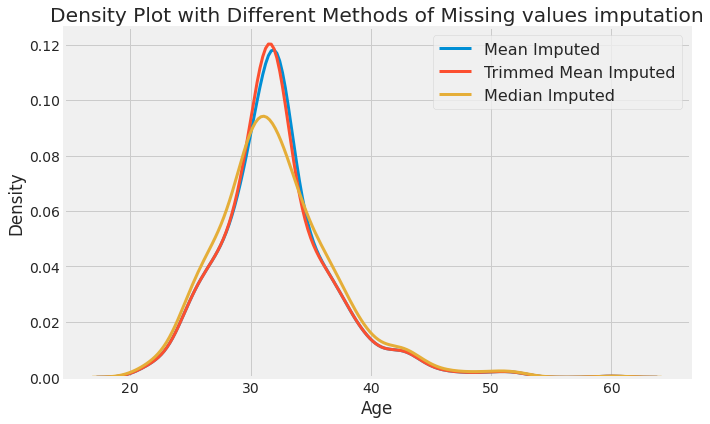

In [18]:
missing_value_imputation(df_2018, "Age")

There are some outliers for age greater than 45. Lets check the mean, trimmed mean and median.

Trimmed mean is near to mean, so we will impute with trimmed mean

In [19]:
df_2018['Age'] = df_2018['Age'].fillna(trim_mean(df_2018["Age"].dropna() , proportiontocut=0.1))

#### Years of Experience

Mean:  8.548497267759563
Trimmed Mean:  8.174061433447099
Median:  8.0


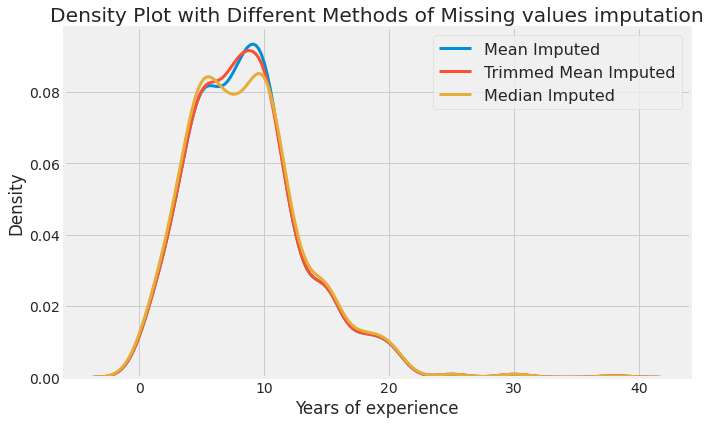

In [20]:
missing_value_imputation(df_2018, "Years of experience")

In [21]:
df_2018['Years of experience'] = df_2018['Years of experience'].fillna(trim_mean(df_2018["Years of experience"].dropna() , proportiontocut=0.1))

#### Current Salary, Salary one year ago and Salary two years ago

Mean:  68381.76533333333
Trimmed Mean:  66669.05
Median:  65000.0


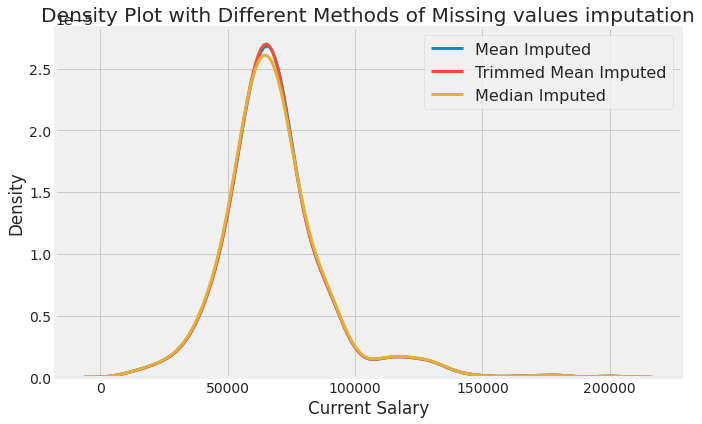

In [23]:
missing_value_imputation(df_2018, 'Current Salary')

In [24]:
df_2018['Current Salary'] = df_2018['Current Salary'].fillna(trim_mean(df_2018["Current Salary"].dropna() , proportiontocut=0.1))

#### Gender

Since, gender is a categorical column, we just cannot impute it with any values. Let's explore a bit to decide the value.

In [37]:
px.bar(df_2018["Gender"].fillna("NA").value_counts().reset_index(), x="index", y="Gender")

In [58]:
df_2018["Gender"] = df_2018["Gender"].fillna("NA")

In [53]:
# NA 
round(100 * (14/df_2018.shape[0]), 2)

1.83

These are 2% of all samples, hence removing this.

In [59]:
df_2018_new = df_2018[df_2018["Gender"] != "NA"]

In [60]:
print("Before   : ", df_2018.shape)
print("After    : ", df_2018_new.shape)

Before   :  (765, 14)
After    :  (751, 14)
